In [20]:
# Import the necessary modules
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.metrics import mean_squared_error


In [35]:

# Print the current working directory
print(f'Current directory: {os.getcwd()}')

# Change to the parent directory
#os.chdir('..')
#os.chdir('Random_forest')

# Print the current working directory again
print(f'Current directory: {os.getcwd()}')


Current directory: C:\Users\alexk\OneDrive\crime_london_project\Random_forest
Current directory: C:\Users\alexk\OneDrive\crime_london_project\Random_forest


In [80]:
# Load the data into a Pandas DataFrame
# Go back to the previous directory
#os.chdir('..')
df = pd.read_csv('df_1999_2021_2.csv')
df

,Borough,Year,Crime rate,Primary & Utilities,Manufacturing,Construction,Wholesale,Retail,Transportation and Storage,Accomodation and food service activities,...,Population per hectare,Life expectancy of men at 65,Life expectancy of women at 65,% of Public sector jobs,% of Private sector jobs,Proportion of seats won by Conservatives,Proportion of seats won by Labour,Proportion of seats won by Liberal Democrats,Consumer expenditure on Alcoholic beverages (£mn),Consumer expenditure on Pubs and Wine bars (£mn)
0,Barking and Dagenham,1999,120.5,0.815000,30.797000,4.529000,7.246000,8.152000,9.058000,4.076000,...,45.0,16.289474,19.384211,20.490909,79.509091,0.0,100.0,0.0,19.793610,30.920531
1,Barnet,1999,98.0,0.694000,4.337000,4.337000,7.806000,15.611000,4.337000,6.938000,...,36.1,18.847368,21.410526,18.445455,81.554545,50.8,47.6,1.6,60.159765,114.874726
2,Bexley,1999,95.1,2.596000,11.869000,6.677000,7.418000,13.353000,3.338000,5.935000,...,35.9,17.915789,20.700000,16.381818,83.618182,71.4,23.8,0.0,23.477447,36.044944
3,Brent,1999,127.7,2.571000,9.254000,7.198000,13.368000,12.339000,6.170000,6.170000,...,60.2,18.300000,21.642105,18.900000,81.100000,9.5,88.9,1.6,46.074271,84.845053
4,Bromley,1999,89.8,0.877000,4.871000,7.793000,5.845000,15.587000,4.384000,5.845000,...,19.6,18.468421,21.284211,15.918182,84.081818,85.0,11.7,0.0,53.105324,92.961117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Sutton,2021,62.0,0.405909,3.748364,7.647500,5.291727,11.284682,5.294500,4.922364,...,48.7,18.068421,20.436842,20.363636,79.636364,16.7,0.0,83.3,47.169628,72.416762
732,Tower Hamlets,2021,97.0,0.426182,3.156727,2.680136,3.345455,3.586318,2.956455,5.033909,...,167.6,16.305263,19.357895,16.954545,83.045455,11.1,48.9,0.0,79.618725,135.643491
733,Waltham Forest,2021,79.0,0.947455,6.222045,5.022318,7.387864,12.119909,4.352000,4.925000,...,75.4,17.231579,20.236842,23.800000,76.200000,26.7,73.3,0.0,26.224553,40.093251
734,Wandsworth,2021,75.0,0.548364,2.574045,3.408000,5.595955,10.836682,4.160182,8.038227,...,98.6,17.152632,20.194737,22.109091,77.890909,68.3,31.7,0.0,122.273988,209.901113


Dont rerun the following cell

In [131]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Borough','Year','Crime rate'], axis=1)
y = df['Crime rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 18)

#0.93
#regressor = RandomForestRegressor(max_depth = 50,random_state = 18)

# Create a RandomForestRegressor object
#0.93
#regressor = RandomForestRegressor(random_state = 18)
"""
1. Health: 0.3343287615192604
2. Dwellings per hectare: 0.2264520201775932
3. Life expectancy of men at 65: 0.1303342891703836
4. Manufacturing: 0.035552038024597624
5. Education: 0.035144776354040966
6. Population per hectare: 0.03168655465054673
"""

#regressor = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 50, random_state = 18)
#regressor = RandomForestRegressor(max_depth = 100,random_state = 18) #n_estimators = 500, max_features = 'sqrt', max_depth = 20, random_state = 18)
#High health score
 #n_estimators = 500, max_features = 'sqrt', max_depth = 20, random_state = 18)

regressor = RandomForestRegressor(n_estimators = 110, max_features = 'auto', max_depth = 30, random_state= 87)


# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
predictions = regressor.predict(X_test)


In [132]:
# import necessary modules
from sklearn.metrics import mean_squared_error

# calculate the MSE
mse = mean_squared_error(y_test, predictions)

# print the MSE
print("Root Mean squared error:", mse**0.5)

# import necessary modules
import numpy as np

# select the target variable
y = df['Crime rate']

# calculate the range of values
range = np.max(y) - np.min(y)

# print the range of values
print("Range of values:", range)



Root Mean squared error: 14.176715779495845
Range of values: 413.0


In [133]:
# Evaluate the model performance
regressor_score= regressor.score(X_test, y_test)
print(f"The regressor.score is {regressor_score}")
# Get the feature importances
importances = regressor.feature_importances_

print("")
# Print the feature importances
for i, col in enumerate(X_train.columns):
    print(f'{col}: {importances[i]}')


The regressor.score is 0.9341457280123454

Primary & Utilities: 0.005447617542388099
Manufacturing: 0.029476199384145866
Construction: 0.007845960726623063
Wholesale: 0.007832021718957345
Retail: 0.00601446196424759
Transportation and Storage: 0.016620743521278472
Accomodation and food service activities: 0.004428671879573903
Information and Communication: 0.010628257166176526
Financial and insurance activities: 0.01029129109703603
Professional, Real Estate, Scientific and technical activities: 0.004248046657044079
Administrative and support service activities: 0.010729574751734207
Public Admin and defence: 0.009632934701227738
Education: 0.045096991551825186
Health: 0.3696305227345436
Arts, entertainment and recreation: 0.01378062852627992
Other services: 0.009470187455898192
Dwellings per hectare: 0.22191973588683542
Average number of homeless people per 1000: 0.004569510294595531
Attainment: 0.0032588374430442507
Happiness score out of 10: 0.0009001017330258009
Anxiety score out of 

### Evaluation of Random Forest Regressor

The `regressor.score()` method is used to evaluate the performance of a `RandomForestRegressor` model on the test data. This method returns the coefficient of determination (R^2) of the prediction, which is a measure of how well the model fits the data.
A value of `regressor_score` for the R^2 means that the model explains 90.7% of the variance in the target variable. This is generally considered a good fit, as it indicates that the model is able to accurately predict the values of the target variable based on the features in the data.

However, the R^2 value is not always the best metric for evaluating the performance of a model, especially when the target variable is not normally distributed or has heteroscedasticity (i.e. the variance is not constant across the range of values). In these cases, other metrics such as mean absolute error (MAE) or mean squared error (MSE) may be more appropriate.



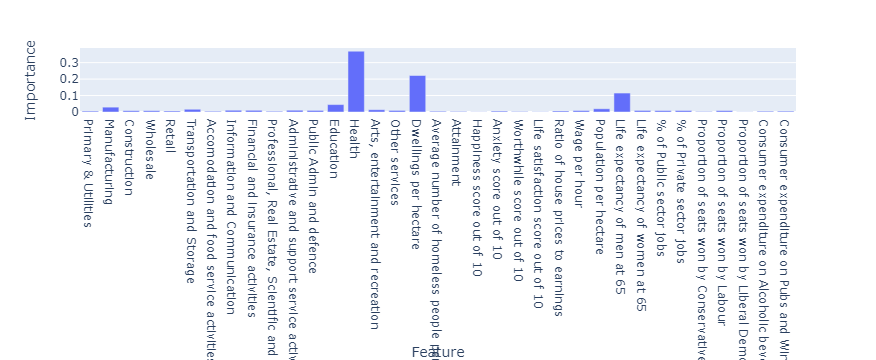

In [134]:
import plotly.express as px

# Get the feature importances
importances = regressor.feature_importances_

# Create a bar chart using the px.bar() function
fig = px.bar(
    x=X_train.columns,
    y=importances,
    labels={'x': 'Feature', 'y': 'Importance'}
)

# Show the plot
fig.show()



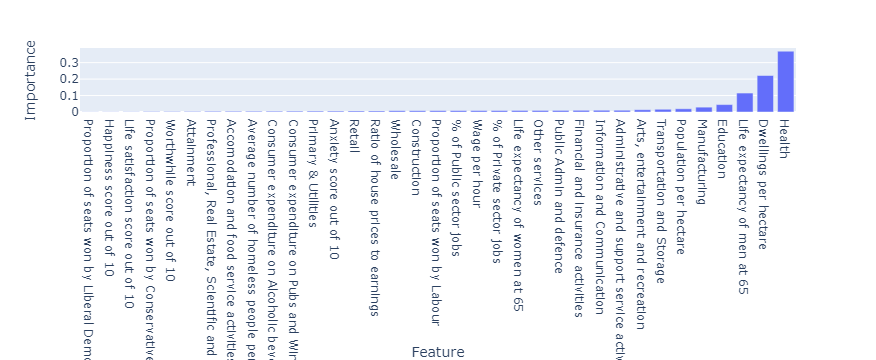

In [135]:
import numpy as np
import plotly.express as px

# Get the feature importances
importances = regressor.feature_importances_

# Sort the importance scores in ascending order
indices = np.argsort(importances)

# Get the column names in the correct order
cols = X_train.columns[indices]

# Create a bar chart using the px.bar() function
fig = px.bar(
    x=cols,
    y=importances[indices],
    labels={'x': 'Feature', 'y': 'Importance'}
)

# Show the plot
fig.show()


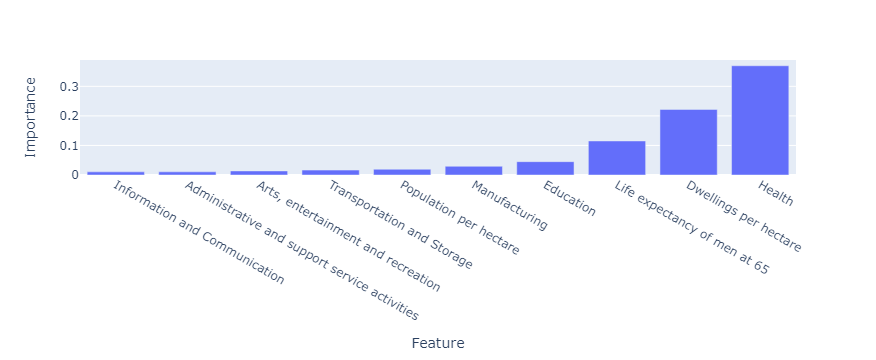

In [136]:
import numpy as np
import plotly.express as px

# Get the feature importances
importances = regressor.feature_importances_

# Sort the importance scores in ascending order
indices = np.argsort(importances)

# Get the column names in the correct order
cols = X_train.columns[indices]

# Get the top 10 most important features
top_10 = cols[-10:]

# Create a bar chart using the px.bar() function
fig = px.bar(
    x=top_10,
    y=importances[indices][-10:],
    labels={'x': 'Feature', 'y': 'Importance'}
)

# Show the plot
fig.show()


In [130]:
for i, feature in enumerate(reversed(top_10)):
    print(f"{i+1}. {feature}: {importances[indices][-i-1]}")




1. Health: 0.3343287615192604
2. Dwellings per hectare: 0.2264520201775932
3. Life expectancy of men at 65: 0.1303342891703836
4. Manufacturing: 0.035552038024597624
5. Education: 0.035144776354040966
6. Population per hectare: 0.03168655465054673
7. Transportation and Storage: 0.014356275945307787
8. Arts, entertainment and recreation: 0.012475129969727402
9. Administrative and support service activities: 0.012296702853015595
10. Other services: 0.012148368662087971
